In [2]:
!git clone https://github.com/aimclub/BAMT.git

fatal: destination path 'BAMT' already exists and is not an empty directory.


In [17]:
!pip install -r /content/BAMT/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.7/249.7 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.3/282.3 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.3 MB/s

In [18]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.6.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.2 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have p

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
sys.path.append('/content/BAMT')

In [5]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/BAMT']

In [6]:
import bamt.preprocessors as pp
import bamt.networks as nets

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
from pgmpy.estimators import K2Score


In [8]:
data_ = pd.read_csv('drive/MyDrive/Diploma/data/dataset.csv')
data_train = data_[data_['train_test_group'] == 'train']
data_train.drop(['train_test_group'], axis=1, inplace=True)
data_train

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
5                44      M                2        Graduate        Married   
...             ...    ...              ...             ...            ...   
10121            56      F                1        Graduate         Single   
10122            50      M                2        Graduate         Single   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0         $60K - $80K          Blue              39                         5   
1      Less than $40K          Blue              44                         6   
2        $80K - $120K          Blue              36                         4   
3      Less than $40K          Blue              34                         3   
5         $40K - $60K          Blue              36                         3   
...               ...           ...             ...                       ...   
10121  Less than $40K          Blue              50                         4   
10122     $40K - $60K          Blue              40                         3   
10124  Less than $40K          Blue              36                         5   
10125     $40K - $60K          Blue              36                         4   
10126  Less than $40K        Silver              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                           1                      3       12691.0   
1                           1                      2        8256.0   
2                           1                      0        3418.0   
3                           4                      1        3313.0   
5                           1                      2        4010.0   
...                       ...                    ...           ...   
10121                       1                      4        3688.0   
10122                       2                      3        4003.0   
10124                       3                      4        5409.0   
10125                       3                      3        5281.0   
10126                       2                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
5                     1247           2763.0                 1.376   
...                    ...              ...                   ...   
10121                  606           3082.0                 0.570   
10122                 1851           2152.0                 0.703   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
5                 1088              24                0.846   
...                ...             ...           

In [9]:
data_.shape

(10127, 21)

In [10]:
data_train[['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category', 'Credit_Limit',	'Total_Revolving_Bal',	'Avg_Open_To_Buy',	'Total_Amt_Chng_Q4_Q1']]

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
5                44      M                2        Graduate        Married   
...             ...    ...              ...             ...            ...   
10121            56      F                1        Graduate         Single   
10122            50      M                2        Graduate         Single   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0         $60K - $80K       12691.0                  777          11914.0   
1      Less than $40K        8256.0                  864           7392.0   
2        $80K - $120K        3418.0                    0           3418.0   
3      Less than $40K        3313.0                 2517            796.0   
5         $40K - $60K        4010.0                 1247           2763.0   
...               ...           ...                  ...              ...   
10121  Less than $40K        3688.0                  606           3082.0   
10122     $40K - $60K        4003.0                 1851           2152.0   
10124  Less than $40K        5409.0                    0           5409.0   
10125     $40K - $60K        5281.0                    0           5281.0   
10126  Less than $40K       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  
0                     1.335  
1                     1.541  
2                     2.594  
3                     1.405  
5                     1.376  
...                     ...  
10121                 0.570  
10122                 0.703  
10124                 0.819  
10125                 0.535  
10126                 0.703  

[9114 rows x 10 columns]

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9114 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              9114 non-null   int64  
 1   Gender                    9114 non-null   object 
 2   Dependent_count           9114 non-null   int64  
 3   Education_Level           9114 non-null   object 
 4   Marital_Status            9114 non-null   object 
 5   Income_Category           9114 non-null   object 
 6   Card_Category             9114 non-null   object 
 7   Months_on_book            9114 non-null   int64  
 8   Total_Relationship_Count  9114 non-null   int64  
 9   Months_Inactive_12_mon    9114 non-null   int64  
 10  Contacts_Count_12_mon     9114 non-null   int64  
 11  Credit_Limit              9114 non-null   float64
 12  Total_Revolving_Bal       9114 non-null   int64  
 13  Avg_Open_To_Buy           9114 non-null   float64
 14  Total_Amt_Ch

In [13]:
data = data_train.copy()
# cols = data.columns[0:15].append(data.columns[-6:])
data[data.columns[15:16]] = data[data.columns[15:16]].astype(float)
#data = data[cols]
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [14]:
data[data.columns[15:16]].dtypes

Total_Trans_Amt    float64
dtype: object

In [15]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(data)

In [16]:
bn = nets.HybridBN(has_logit=False, use_mixture=True) # init BN
info = p.info
info

{'types': {'Customer_Age': 'disc_num',
  'Gender': 'disc',
  'Dependent_count': 'disc_num',
  'Education_Level': 'disc',
  'Marital_Status': 'disc',
  'Income_Category': 'disc',
  'Card_Category': 'disc',
  'Months_on_book': 'disc_num',
  'Total_Relationship_Count': 'disc_num',
  'Months_Inactive_12_mon': 'disc_num',
  'Contacts_Count_12_mon': 'disc_num',
  'Credit_Limit': 'cont',
  'Total_Revolving_Bal': 'disc_num',
  'Avg_Open_To_Buy': 'cont',
  'Total_Amt_Chng_Q4_Q1': 'cont',
  'Total_Trans_Amt': 'cont',
  'Total_Trans_Ct': 'disc_num',
  'Total_Ct_Chng_Q4_Q1': 'cont',
  'Avg_Utilization_Ratio': 'cont',
  'target': 'disc_num'},
 'signs': {'Credit_Limit': 'pos',
  'Avg_Open_To_Buy': 'pos',
  'Total_Amt_Chng_Q4_Q1': 'pos',
  'Total_Trans_Amt': 'pos',
  'Total_Ct_Chng_Q4_Q1': 'pos',
  'Avg_Utilization_Ratio': 'pos'}}

In [17]:
bn.add_nodes(info)

In [18]:
bn.get_info()

name        node_type data_type parents parents_types
0               Customer_Age         Discrete  disc_num      []            []
1                     Gender         Discrete      disc      []            []
2            Dependent_count         Discrete  disc_num      []            []
3            Education_Level         Discrete      disc      []            []
4             Marital_Status         Discrete      disc      []            []
5            Income_Category         Discrete      disc      []            []
6              Card_Category         Discrete      disc      []            []
7             Months_on_book         Discrete  disc_num      []            []
8   Total_Relationship_Count         Discrete  disc_num      []            []
9     Months_Inactive_12_mon         Discrete  disc_num      []            []
10     Contacts_Count_12_mon         Discrete  disc_num      []            []
11              Credit_Limit  MixtureGaussian      cont      []            []
12       Total_Revolving_Bal         Discrete  disc_num      []            []
13           Avg_Open_To_Buy  MixtureGaussian      cont      []            []
14      Total_Amt_Chng_Q4_Q1  MixtureGaussian      cont      []            []
15           Total_Trans_Amt  MixtureGaussian      cont      []            []
16            Total_Trans_Ct         Discrete  disc_num      []            []
17       Total_Ct_Chng_Q4_Q1  MixtureGaussian      cont      []            []
18     Avg_Utilization_Ratio  MixtureGaussian      cont      []            []
19                    target         Discrete  disc_num      []            []

In [21]:
%%time
bn.add_edges(discretized_data, scoring_function=('K2',K2Score)) # scoring_function=('MI',) # scoring_function=('K2',K2Score)

  0%|          | 0/1000000 [00:00<?, ?it/s]

CPU times: user 8.41 s, sys: 870 ms, total: 9.28 s
Wall time: 9.33 s


In [ ]:
bn.get_info()

name                   node_type data_type  \
0               Customer_Age                    Discrete  disc_num   
1            Education_Level                    Discrete      disc   
2             Marital_Status                    Discrete      disc   
3              Card_Category                    Discrete      disc   
4      Contacts_Count_12_mon                    Discrete  disc_num   
5        Total_Revolving_Bal                    Discrete  disc_num   
6             Months_on_book                    Discrete  disc_num   
7            Dependent_count                    Discrete  disc_num   
8                     target                    Discrete  disc_num   
9             Total_Trans_Ct                    Discrete  disc_num   
10    Months_Inactive_12_mon                    Discrete  disc_num   
11           Total_Trans_Amt  ConditionalMixtureGaussian      cont   
12       Total_Ct_Chng_Q4_Q1  ConditionalMixtureGaussian      cont   
13  Total_Relationship_Count                    Discrete  disc_num   
14                    Gender                    Discrete      disc   
15      Total_Amt_Chng_Q4_Q1  ConditionalMixtureGaussian      cont   
16           Income_Category                    Discrete      disc   
17     Avg_Utilization_Ratio  ConditionalMixtureGaussian      cont   
18           Avg_Open_To_Buy  ConditionalMixtureGaussian      cont   
19              Credit_Limit             MixtureGaussian      cont   

                                     parents               parents_types  
0                                         []                          []  
1                                         []                          []  
2                                         []                          []  
3                                         []                          []  
4                                         []                          []  
5                                         []                          []  
6                             [Customer_Age]                  [disc_num]  
7                             [Customer_Age]                  [disc_num]  
8                    [Contacts_Count_12_mon]                  [disc_num]  
9                    [Card_Category, target]            [disc, disc_num]  
10                                  [target]                  [disc_num]  
11                  [Total_Trans_Ct, target]        [disc_num, disc_num]  
12                          [Total_Trans_Ct]                  [disc_num]  
13                  [Total_Trans_Ct, target]        [disc_num, disc_num]  
14   [Card_Category, Total_Trans_Ct, target]  [disc, disc_num, disc_num]  
15                 [Total_Trans_Amt, target]            [cont, disc_num]  
16                                  [Gender]                      [disc]  
17             [Gender, Total_Revolving_Bal]            [disc, disc_num]  
18    [Avg_Utilization_Ratio, Card_Category]                [cont, disc]  
19  [Avg_Open_To_Buy, Avg_Utilization_Ratio]                [cont, cont]

In [ ]:
%%time
bn.fit_parameters(data)

CPU times: user 3min 35s, sys: 2min 49s, total: 6min 24s
Wall time: 4min 6s


In [ ]:
import pickle

with open("BN_model_test_K2", "wb") as f:
    pickle.dump(bn, f)

In [ ]:
import pickle

with open("BN_model_test_K2", "rb") as f:
    bn = pickle.load(f)

In [ ]:
bn.plot('Graph.html')

In [ ]:
%%time
sample = bn.sample(data.shape[0])

100%|██████████| 9114/9114 [02:11<00:00, 69.32it/s]


CPU times: user 2min 8s, sys: 857 ms, total: 2min 9s
Wall time: 2min 11s


In [ ]:
#sample = bn.sample(20000, parall_count=5)

In [ ]:
sample = sample.astype(data.dtypes.to_dict())
sample = sample[data.columns]

In [ ]:
#sample.to_csv("syntetic_crap_train_9k_NEW.csv")

In [ ]:
sample = sample.fillna((sample.mean()))
sample.info()

TypeError: Could not convert ['FMFFMFMFFMFFMFMFFMFMMFMMMFFMFMFMMFMMFMFMMFMFMMFMMMFMMMMMMMMMFMFMFFMFMFFMFFFMMFFFMFFFFMFMFFMFMFFFFMFMMFFFMMFMMFMMFFFFFFFFMFFFFFFFFFMFMFMMFFFFFMFFMFMMFFMFFMMFMMFFMMMFFFFMFMMMFMFFMFFMFMFFFMFMFFFMFFFMMMFMMMMFMFFMMMFFFMFFMFFFFMFFFMFMMFFMFMMFFMFMMFMMMMFFFFMFFFFFMMFFFFFMMMMMMFMMMFFMMMMFFFFMMMFMMFMFFMFFFFMFMFMMFFMFFFMMMMFFMFFMFFFFFFMMMMFFFMMFFMFMFFFFMFMMFFFFMMFFMFMFMFFFMFFMFMFFFMFFFMFMMMMMFFMFMFMMMFMFFFMFFFMMFMFMMFFFFMFMFMFFFFFMMMFMFFFMMMFFFMMMFFMFFFMMFFFFFMFFMFFMMFFMMFMFMFMMMMMMFMMFFFFFMMMFMFFFMMFFMFFFMFFFMFFMFFMFMFMMFFFFFFFFMFFFFFFMFFFFFFFFMMMMFFFMFFFMMMMFFFFFFFFMMMMFFFMMMMFFFFMMFMFMMMFFMFMMMMFFFMMFMMFFMFMMFMFFMFFFFMMMMFFFFFMMFFMFFFMMMMFMMMMFFMMFFFFMMFFFMFFMFMMMFFFFFMMFMFFMMMFMMMMFFMMMFMFMMMFFFMMMFFFMFFFMMFFFFMMMFMFMMFFFMMMMFFMFMFMFFFFMFMMFMFFFFFFMMFMMFMFFMMMMMFMFFFMMFMMFFFFFFMFMMMFFMMFMFMFFFMMMFFFFMMMMFFFFMMMFFMFFFFFMFMMMMMMFFMMMMFFMFFMFFMMFFMMMFFFMFFFMFMMMFFMMFFMFFMFFFMMFFMMMFFFFMFMMFFFMMMMMFMFMMMFMMMFMFFFFMMFFMMMMMMFMMFMFFFFFMMFMMFMFFMMFFMFFFMMFFFFMFFFFFFMFMFFMFMFFMFFMFFMMFMMFMFFFMMFMMFFMMMFFFMMMFFFFFMMMFFFMFFMMMFMMFMMMMMMMMMFMFMMFFFFMMMMFMMMFMFFMMFFMFFMFFFMFFMMMFMFMMMFFMFMMFFFMFMMFMFFFMMFFFMMFMMFFFMFFFFMFFFFMFMFMFFFFFMMMMMMFMFFMMMMFMMMMMMFFFMFFFFMFFFFFFMMMFFFFFMFMMMFMMMMFMMFFFFFMFMMMMFMMFMFMMFFMFMFFFMMMFFMFFMMMFMMMFFFFFMMMMMFFMMFMMMFMFMMFFFMMFMMFMFMFFMFFFMMMMMFFFFMFFMMMFFMFMMMFFFMFMFMMFFFMMFFFMFMFFFFMMFFFFFFFFFMMFFFMFFMFMFFMFFFFFFFMMMMMMFFFFMMFMFFFMFFFFFFFMMFMFMFFFMMMFMFFMFMMMMMFFFMFFFFMFMFMFFFFMMMFFFMFFFFFMMMMMMMMFFMFMFMMMFFFFFMFFMFFFMFFMFMMMFFFFFFFMMFFMFMMFMMFMFMMFFFFFFMMFFFMMFFFFFFFMMMMFFMFMMFFFMMMFFFFFFFMMFMMFFMFFMMMMFMMMFFFFMMMFMMMMFMMFMFMFFFMFFFMFMMFMFFFMMMFFMFFFFMFMMMFMMFMFMMMFMMFMMMMMMFFFFFFMFFMMMMMMMMMFMMMMMFFMFMMFMMMFFMMMMMMMFMFFFFMFFMMFMMFFMMMMFMFMMFFMFFMFMFFFFMMMFFMMMFFFMFMMMMFFFFFMFFMFFMMFMMMFFMFFMMMFFMFFMMMFFMMMMMFFFMFMMFMMFMMFMMMMMFMFMMMFMFMFMFFFMMFFFFFMMMMFMFMFFMFMMMMMFMMMFMFFFFMFMFMFFFFFFFMMFMMFFMFMFFFMMFMFFMFMMMFFMMMFMFMMMMMMMFFFFFFMMFFFFFFMMMMFFMFFFMFMFFFFMMFMFMFFMMFFMMFFMMFMMMMMMFFMFFMFFMMFMFFMFFMFFFFMFFMFFMFMMFFFMFMFMMMMFMMFMMFFMMFFFMMMFMFMFMMMMMFMMMFFMMMFFFMMFFFMMMFMMMFMMMMFFFMFFMFMMMFFFMFMMFMMFFMFFFMMMMFFFMMMMMFFFFFMMFFFFFFFFMMMFFFMFMFMMMFFFFMFMFFFMFMFFFFFMMMFMFFMMFMFFFMFMFFFMMMMMFFFMFFMFFFFFMFFFMMFMMFMMFMFFFMMFFFFFMMMFMMFMFFFFFFMFMMMMFMMMMMFMFMMFMFFFFFMMFFMMMFMMMMFFMFFFFFFMMMFFFMFMMMMMFFFMFMMMMMFMFFFMFMMMFMMFMFMMFMMFMFMMFFFFFMMFFMFFFMFMFMMFMMFFMFFFFMMFFFFFMMMFFMFFMMFMMFMMFFFFMFMMFFFFMMFMMMMMFFFFFFFFMFMFFMFFFFMMFMFFMMMFFMFFFMMFMFMMMMMMFFFFMMMFMFFMMMFMFMFMMFMFFFFFFMMFMFMFFMMFFFFFFFMFMFMMFMFMMFFMFMMMMFMMFFFFMFMFFMFFFFFFFFFMFMMMMMFFFMMMFFFFFFMMFFMFFFMFFMMMMMMFFFFMMFMMMMMFMFFFMMFMMMFFFFMMFFFMFFFMMFMFMFMFMFFMFFMMFMMFFFFFFMFFMMFMMMMMFMFFMFFFFFFFMMMFFFMFFMFFMMMFFMFMMFMMFFFFFFFFFMFMMMFMMMFMMMFMFFFFMMMFMFFFFMMMMFFFFFFMMMMMMFFFFMFFFMMMFFMMMFFMMFFFMFMFMFFFMMFMFMFFFMFFFMMMFMMFMMMFMFFMFMMMFMMMFMFFMFMMFMMFMMFFFFFFFFFFFFMMFMFMMMMMFFFFFMFFFFMFMMFFMFMMFMFFMMFMFMFMMFMFFFMFMFFFMMFFFMMMFMFFMMMMFFMMFMFFMFMMFFMFMFFFFMFFFFMMFMMMMFFMMFFMFMFMFFMMMFMMFMFMMMMFMFFMFFMFMMFMMFMMMFMFFFMFMFFFMFMFFFFMMMFFFFFFMFFFMMFMMFFMFFFFMFFMFMFMFMFFMFMFFMFFFMFFFFMMMMMFMFFFFMMMMMMMMFMMFFFFMFMFFMFFMMMFFFMMFFMFFMMFFFMMFFMFMFFFMFMFMMFMMFFFMFFMMMMFFFMMMFFMMFMFFMFFMFFMMMFMFFFMMMMMFMMFFMFMFMFMMFFFFFMFMFMMFMMMMMFFMMFMFMMFFMMMFFMFMMFFMMMMMMFMMMFMMFFFMFFFFFFFFFFMMMFFFFFMMFMMFMMMMFFMMFFFMMFMFFFFMMMMMFMMFMFFMFMFFMMMMFMMMMFFMFMMMFFFMFMMFMMFMMMMFMFMFMFFMFFMMMMFMFMFFFMFMFMMMMFMMMFFMMFMMMMMFMMFFFFFFMMMMFMFMFFMFMFFFFFMMMFMMFFFMFFFFFFMFMMFFMFMFMMMFMFFFMFFFFFFFMMFMMMMFMMMFMMMFFFMFFFMFFMMMFFMMMMFFFFFFFMFFFFFFFFFMFFMFMMMMFMFMFFMFFMFMMFMFMMFMFFFFMMMMFMMFMFFMMFMFMMFMMFFFFFFMMFMFFMFFMFFFMFFFFMMMFFMMMMFFFMMFFFFMFMFFFMFFMFMFMMMFMMFFFMFFFMMMFMFFMMMFMFFMFMMMFFFMMFMFMFMFMMFFMMMFFMFMFFFMMMMMMFFFFFFFFFFFMMMFMMMMMMFMFMFFMFFMMMFFMFFMFFFFFFFMFMMMMFMFMFFFFFFFMMMFFFMFFFFMMFFFMFFMFFMFMMMFMFFFFFFFFFMFFFFMMFFMFMFFMMFMFFFMFFFFMMFFFMMFFMFMFMMMMMFMFFMMFFMMFMFMMMMMFMMMFMMFFFFFMFFFMMMMFFMFFFFMFFMMFFMFFMFFMFFFFMFMMMMFFMMFMMFFFMFMFFFMMFMFMMMFFFFMMMMFMMMFMFFFMFFMFMMMFFFMMFFMFFMFFFMFMFFFMMMMMFMMMMMMMMMFMMFFFMMFFMMFFFFMFMFMMFMFFMFMMFMFMMFMMFFFMFMMFMMMMMMFMFMFMMFFMMMFMMMMFMFMFMFFMFFFFMMMFMMMFFFFMMMFMFFMFMMFFFFMMMMFFMFMMMFMFMFMFFFFFMFFFMMMMFFMFMFMFMFMFFFFFMMFFMFFFMFFMFMMMFFMMMFFMFFFFMFFMFFMMFFMFMFFMMFFFFFFFFFMFFMFFFMMFMFMMFMMMFFMMMFMFFMMMMFFMMMFMMMFMFFFFMFMMMFFFFMMMMMFFMMMMMMMFFFMMFFFMFMMFFMFFMFFMMMMFFMMMFMMMMFFFFMMFMMFMFFFFFMMMFFFMFFFMFMFFMMFMMMMFFFMFFMFMMFFMMMFMFMMMMFFMMFMFFMMMFMMMFFFMFMFFFMMFFFFFFFMMMFFMFFFFFMFMMMFMMMFMMMFMMMFFMFFFFMMFMMFFMMFFFFFFFFFFMMMFMFFMMFMFFMFFFMFMMMFMMFFFMFMFMMFFFMMMMFMFMMFFMFFMFMFFFMMMFMFFFFMFFFFFFMMMFMMMFFFFMMMFMFMFFMFMFFFFMMMMFMMMFFFMFMMFMFFMMFMFMMMMFFFFMMFFFFMFFFFMMMFFFFMFFMMFFFMFFFFFMFMMFFFMMMMMFFMMMMFFFFMMMFMMMMMFFFFMFMMFFMFMMMFFFMMFMMFFFFMMFMMFMFFMFFMFFFFMFMFFFFFMFFFFFFMMMMFFMMFMFFFFFFMFFFMFMMMMMMMFFFMFFFMMMFMFMFFMFFMMFFFMMMFFFMMFFFMFFFMFFMMFMFFFMMMMFMMFFFMMFFMFMFMMFFMMFMMFFFMMFMMMMFMFMFMFFMFFFFFFMMFMFFFMMMMFFFMFMMMMMFMFMMMFFFMFMFFFFMMFFMFMMFFFMFFFFMFMMMFFFMFFMFFFMFMMMFMMMFFFFMMMMMFMFFMFFMFMMMFMFFFMMFMFFFMMFFMMFFFFFMMFMFMMFMFFFMMMMFMFFFMFMFMFMMFFMFMFFMFMFMMFMFMFMFMFMMMFFMMMMMMFFMFFMFFMMFMFFFMFMMFFMFMMMFFMMFMFFMFMMFFMMFMFMMMFFFMFFMMMFFFMMFFMMMMFMFFFFFMFMMFFFMMMFFMFMFMFMFFMMFMFMFFFFMMMMFMFMFFFMFMMFFMMMMFFFFFMFMFFFMMFMMMMMMMMFMMFFFMMMFMMFFMFFFFMMMFMFMMFFFFMFFMFFFMFMFFMMFMFFMMMMFFMMFFMFFMMMFFFMFMMFMMMFFMFFMFFMFMFFMFFFMFMFFFFFMMFMMMMFMFFFFMMMMFFFMMMMMFFFFFMFFMMFMFFMFFFMMFFFMFFMFMMFFFFMMMFFFFMFMMFMMFFMMFMMMMFMFMFFFMMFFFFMMFMFMFFMMFMFMFMMFMFMFFMFMMMMMFMFMFMFMMFFFFMMMFFMFMMMMFMMMFMFFFMFFMMMMFFFFFFMFMFMFMFMFMFFMMMFMMFMMFFFFFFMMMMMMFFFFMFFMFFFFFFFMFMFMMFFFFMMFFFMMFMMFMMMMFFMFFFFMFFFFMFFFFMMFMFMMFMMMMFFFMFFFFFMFMMMFMFMMFMFMFFMMMFMMFFMFFFMFMFMFMMMFMMFFMMMMFMFMMMMMMMFFMFFMMFFFFMMFFMFFFFFFFFFMMMMMMFFMMMMMFFFMMMMFMMFMFMFFFFMMFFFFFFFFMFMFMFFMMMMMMFFFFMMMMFMFFMFMMFFMFFFFFFMMMFMMFFMFFMMFFFFFFFMMMFFFMFFMFFFMMFMFMMFMFFFMMFFFMMFMFFMMFFMMMMMFMFFFMFFFFFFMMMMMFMMMFFMMFMMMFFFMMFFMMMFFMMMFFFMFFMFFMFFMFFFMFFMMFFFMFFFFFMMFFFFFFFMMMFFFFFMMFFFFFFFMMMFFFMFMFFFFFMFFMFFMMFMFMFFFMFFFMFFFFMFMFMFFFMFFMMMFMFFMFMMMFFFMFMFMMMFFMFFFFFFFMFFMMFFFFFMFFMFMMMFFFFFMFMMFFFFMMFMFFMFMMFFFFFFFMFFFFMMFMFFMFFFMFFMMMFMMMFMFMFMFFMFMMFFFMFMMMMFMMFMFFMFMMMMMFMFMFFFFFFFMFMMFFFMFFMMFMFFFFFFMFFMMMMFMFMMFMFMMFFFFFFMMFFMFMFMMFMMFFMMMMFFMMFFFMMMMFFMFMMMFMFFFFMMFFMMMMMFFMMMMMMMFFMFMMMFMMFFFMFMFFMMFFMFFMMMMMMMFFMMFFFMMFFMMMFMFFFFFMMFFFFFFMFFMMMFFMMMFMFFFMFFFFFMMMMMFFMMFFMFMFFFFMFFFMMMMFMMFFFFMMFFMFMMFFFMFMFMMMMFMMFFFFFFMMMMMMFMFFMFMMMFFMMFMMMMFFMFMMFMFFFFFMFFFFFMMMFMFMFFMFFFFMMMFFMFFMFFFFFMMFMMFFFMFFFMMFFFFFFMFMMFFFMMFMFFMFFMMFFMFMMMFMMFMFFFFFMFMFFMMFFFMFMFMMFMFMFFMMMMFFMFMMFFMMFMMFMMFFMFMFMFMMFMFMMMMFFFMMFMMFMFFFFMMFFFMMMMFFFFMFFFFFFMFMMFFMFFFMMFFFMFFMFFFMFFMFMFFFMFFMMMFFMMFFMFFMFMMMFFMFFMMMMFFFMFFFFFFFFFMFMMMMMFMMFFMMMFMFFFFMMFFMMMFMMMMMFFFMFMFMMMFFFFMMFFFMMFFFFFMMFFMMMMMFFMMFFFFFMMFMFMMMFFFMFFFFMMFFMFMFMFMFFFFFFMMFFMMFMMMFFMFFFFFFFFMMMFMFFMFMFMMMFFFFMMFFMMFFFFMFFFMFFMMFFMFFMFFFMMFMFFMFFMMMMMMFFMMMFFFFFMMMMMFFFMFMFFFFFFFMMFFMMMMMMMFFMFMMFFFFMFMFMMMFFMFMFFMMFMFFMMMFFFFMFFMMFFFFMFFMFMFMMMFMMFMFFMFMFMFFFFFFMMMFMMFMMMFFFFMFFMFFFMMMFFFMMFFFFFFFFMMMMFFMFMFMMMFMFFMMFFMFMMFMFMFFFFFFMMFFMFFMMFFFMFMFMMFFFFFMFMFFFMFFFMFFFFFFMMFMFMMMMFMMFMFMFFMFFFMFFFFFFFMFMFFFFMFMFFFMFFMMFFFFMFMFFFFFMMFMMMFMFMMFMFFFMMMMMMFMMFMFFFMMFMFMMMFFMFMFFMMFFFFFFFFFFFFFMFFFMFFFFMMFMFMMFFMFFMFMMMMFMFFFMMFMMMMMFMMFMFFFMFFFMMMMMFMFMMFMMMMMMFFFMMMMMMMMMMMFMMMMFFMFMMMFFFFFFFFMMMFMFMFFFFFFMMFMMFFFFMMMFMFFFFFFFMMMFFFFMMMFMFFFFMMMMFMMMFMMFMFMMFMMMMFFFMFFMFMMMMMFFMMMFFMMFFFFFMMMMMMFFFFFMFMMFFMFMFFFMMMFFFFFMFFFFMMMMMFMFMFMMFFMFMMMMMFFFFMFFFMFFMMFMFFMFFFFFMMMFFMFFFFFFFMMMMMMFFMMFFFMMMMMMMFMMMFFFMMMFFFFMFMMFFFMFFMMMFFMFFFMMFFFMMMMFFMMFFFFMMMMFMMMFMFFFMFFMFMFFFFFMMMFMMFMFFFMFFMFMFFMFFMFFFFFFMMFMFFMMMFFMFFMFMFMMMFMMFMFFFFMMMFMFMFFFFMMFFMMMFFMFFMFFFFFMFFFFFFMMFMMMFMFMMFFFFMMMFFMFMFFMMMFMMFMFMFMFFMFFMFMFFFMFFFMFFFMFFFFMMFMMFMFMFFMMFMMFFFFMMFMMMMMFFFMFFFFFMFMFFFMFMMFFFMMMMFMMMFMMMMMFFFMFMMFFFMFFFFMFMFMMMFFFFFFFFFMFMMMFFFMFFFFMFMFMFFMMFMMFFMFMFFFFMMMFMFFFMMFMMFMMMFFMMFMFFMMFFMFFMFFMFFFMFMMFFFFFFMMMFFFMMFFMFMFFFFMFFFMMFFFFMMFFFFFFMFMMFFMFFMFMMFFMMFMFFMFMFMMFMFMMFFFFFM'] to numeric

In [ ]:
sample.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
target                      0
dtype: int64

In [ ]:
sample.dtypes

Customer_Age                 object
Gender                       object
Dependent_count              object
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book               object
Total_Relationship_Count     object
Months_Inactive_12_mon       object
Contacts_Count_12_mon        object
Credit_Limit                float64
Total_Revolving_Bal          object
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct               object
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
target                       object
dtype: object

In [ ]:
sample.Customer_Age = sample.Customer_Age.astype(int)
sample.Dependent_count = sample.Dependent_count.astype(int)
sample.Dependent_count = sample.Dependent_count.astype(int)
sample.Months_on_book = sample.Months_on_book.astype(int)
sample.Total_Relationship_Count = sample.Total_Relationship_Count.astype(int)
sample.Months_Inactive_12_mon = sample.Months_Inactive_12_mon.astype(int)
sample.Contacts_Count_12_mon = sample.Contacts_Count_12_mon.astype(int)
sample.Total_Revolving_Bal = sample.Total_Revolving_Bal.astype(int)
sample.Total_Revolving_Bal = sample.Total_Revolving_Bal.astype(int)
sample.Total_Trans_Ct = sample.Total_Trans_Ct.astype(int)
sample.target = sample.target.astype(int)

In [ ]:
#X_train

In [ ]:
#X_train.dtypes

# Test

In [ ]:
data_test = data_[data_['train_test_group'] == 'test']
data_test.drop(['train_test_group'], axis=1, inplace=True)
y_test = data_test[['target']]
X_test = data_test.drop(['target'], axis=1)

In [ ]:
X_train = data_[data_['train_test_group'] == 'train']
X_train.drop(['train_test_group'], axis=1, inplace=True)
y_train = X_train[['target']]
X_train = X_train.drop(['target'], axis=1)

In [ ]:
# y_train_fake = sample[['target']]
# X_train_fake.drop(['target'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import math
import lightgbm as lgb
from sklearn.metrics import f1_score, fbeta_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold,cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from feature_engine import encoding as ce

In [ ]:
categorical_features=list(X_train.loc[:, X_train.dtypes== object].columns)

In [ ]:
LR_pipe = Pipeline([
    # Integer Encoding for Categorical Variable
    ('encoding', ce.OrdinalEncoder(
       encoding_method='arbitrary', variables=categorical_features)),


    # Feature Scaling
    ('scaler', StandardScaler()),

    # oversampling with ADASYN
    #("oversampling", ADASYN(sampling_strategy='auto', random_state=0, n_neighbors=5)),

    # models
    ('RF', LogisticRegression())
    ])

RF_pipe = Pipeline([
    # Integer Encoding for Categorical Variable
    ('encoding', ce.OrdinalEncoder(
       encoding_method='arbitrary', variables=categorical_features)),


    # Feature Scaling
    ('scaler', StandardScaler()),

    # oversampling with ADASYN
    #("oversampling", ADASYN(sampling_strategy='auto', random_state=0, n_neighbors=5)),

    # models
    ('RF', RandomForestClassifier())
    ])

In [ ]:
def lgbm_predict(xx_train,yy_train, xx_test, yy_test, categorical_features):

  model = lgb.LGBMClassifier(random_state=42, categorical_feature=categorical_features)
  for col in categorical_features:
    xx_train[col] = xx_train[col].astype('category')
    xx_test[col] = xx_test[col].astype('category')
  model.fit(xx_train,yy_train)
  lgbm_prediction = model.predict(xx_test)
  print(roc_auc_score(yy_train, model.predict(xx_train)))
  print(roc_auc_score(yy_test, model.predict(xx_test)))

  return roc_auc_score(yy_train, model.predict_proba(xx_train)[:, 1]), roc_auc_score(yy_test, model.predict_proba(xx_test)[:, 1]),

In [ ]:
def fit_predict(clf, xx_train,yy_train, xx_test, yy_test, categorical_features):
  clf.fit(xx_train,yy_train)
  y_pred_test = clf.predict_proba(xx_test)[:, 1]
  print(roc_auc_score(yy_train, clf.predict(xx_train)))
  print(roc_auc_score(yy_test, clf.predict(xx_test)))
  return roc_auc_score(yy_train, clf.predict_proba(xx_train)[:, 1]), roc_auc_score(yy_test, clf.predict_proba(xx_test)[:, 1])

In [ ]:
df_lr = pd.DataFrame(data=[fit_predict(LR_pipe, X_train.copy(), y_train, X_test, y_test, categorical_features), \
                   fit_predict(LR_pipe, sample.drop(['target'], axis=1), sample['target'], X_test, y_test, categorical_features)],
                   columns = ['Train', 'Test'],
                      index = ['Initial', 'Bayes'] )
df_lr['model']='LR'

0.7732564555876995
0.767502706604114
0.6918367518776734
0.6665283291230604


In [ ]:
df_rf = pd.DataFrame(data=[fit_predict(RF_pipe, X_train.copy(), y_train, X_test, y_test, categorical_features), \
                   fit_predict(RF_pipe, sample.drop(['target'], axis=1), sample['target'], X_test, y_test, categorical_features)],
                   columns = ['Train', 'Test'],
                      index = ['Initial', 'Bayes'] )
df_rf['model']='RF'

1.0
0.8896968603392277
1.0
0.8297762540599062


In [ ]:
categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
df_lgbm = pd.DataFrame(data=[lgbm_predict(X_train.copy(), y_train, X_test, y_test, categorical_features), \
                   lgbm_predict(sample.drop(['target'], axis=1), sample['target'], X_test, y_test, categorical_features)],
                   columns = ['Train', 'Test'],
                   index = ['Initial', 'Bayes'])
df_lgbm['model']='Lgbm'

[LightGBM] [Warning] categorical_feature is set=Gender,Education_Level,Marital_Status,Income_Category,Card_Category, categorical_column=1,3,4,5,6 will be ignored. Current value: categorical_feature=Gender,Education_Level,Marital_Status,Income_Category,Card_Category
[LightGBM] [Info] Number of positive: 1464, number of negative: 7650
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 9114, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160632 -> initscore=-1.653533
[LightGBM] [Info] Start training from score -1.653533
0.9995277509911068
0.9412558643089137
[LightGBM] [Warning] categorical_feature is set=Gender,Education_Level,Marital_Status,Income_Category,Card_Category, categorical_column=1,3,4

In [ ]:
df=pd.concat([df_lr, df_rf, df_lgbm])
df.index.rename('Data', inplace=True)
df.reset_index(inplace=True)

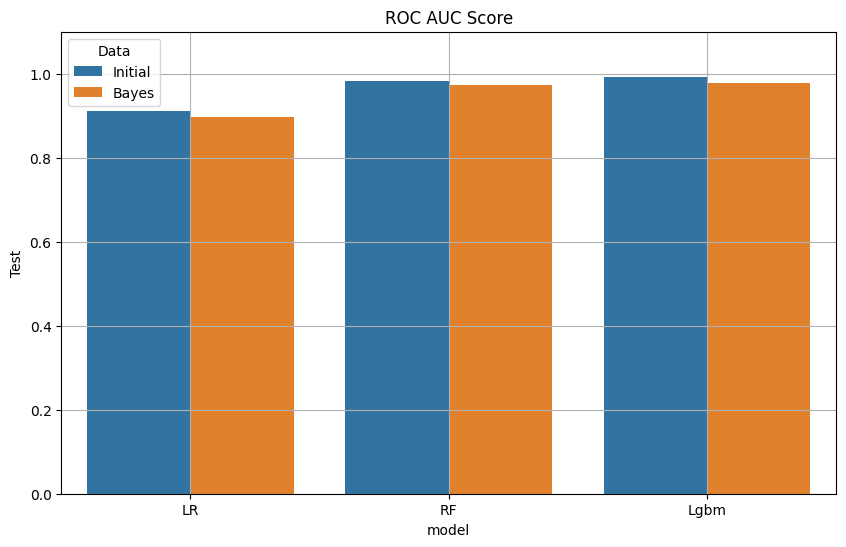

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'model', y = 'Test', hue = 'Data', data = df)
plt.title('ROC AUC Score')
plt.ylim([0., 1.1])
plt.grid()
plt.show()

In [ ]:
df

Data     Train      Test model
0  Initial  0.925408  0.910545    LR
1    Bayes  0.896167  0.897250    LR
2  Initial  1.000000  0.983132    RF
3    Bayes  1.000000  0.972010    RF
4  Initial  0.999999  0.992515  Lgbm
5    Bayes  0.999793  0.976940  Lgbm

# Visualization

In [ ]:
categorical_features_ = list(data.loc[:, data.dtypes== object].columns)

In [ ]:
data.shape, sample.shape

((9114, 20), (7858, 20))

In [ ]:
data.dtypes

Customer_Age                 object
Gender                       object
Dependent_count              object
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book               object
Total_Relationship_Count     object
Months_Inactive_12_mon       object
Contacts_Count_12_mon        object
Credit_Limit                float64
Total_Revolving_Bal          object
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct               object
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
target                       object
dtype: object

TypeError: '>=' not supported between instances of 'str' and 'int'

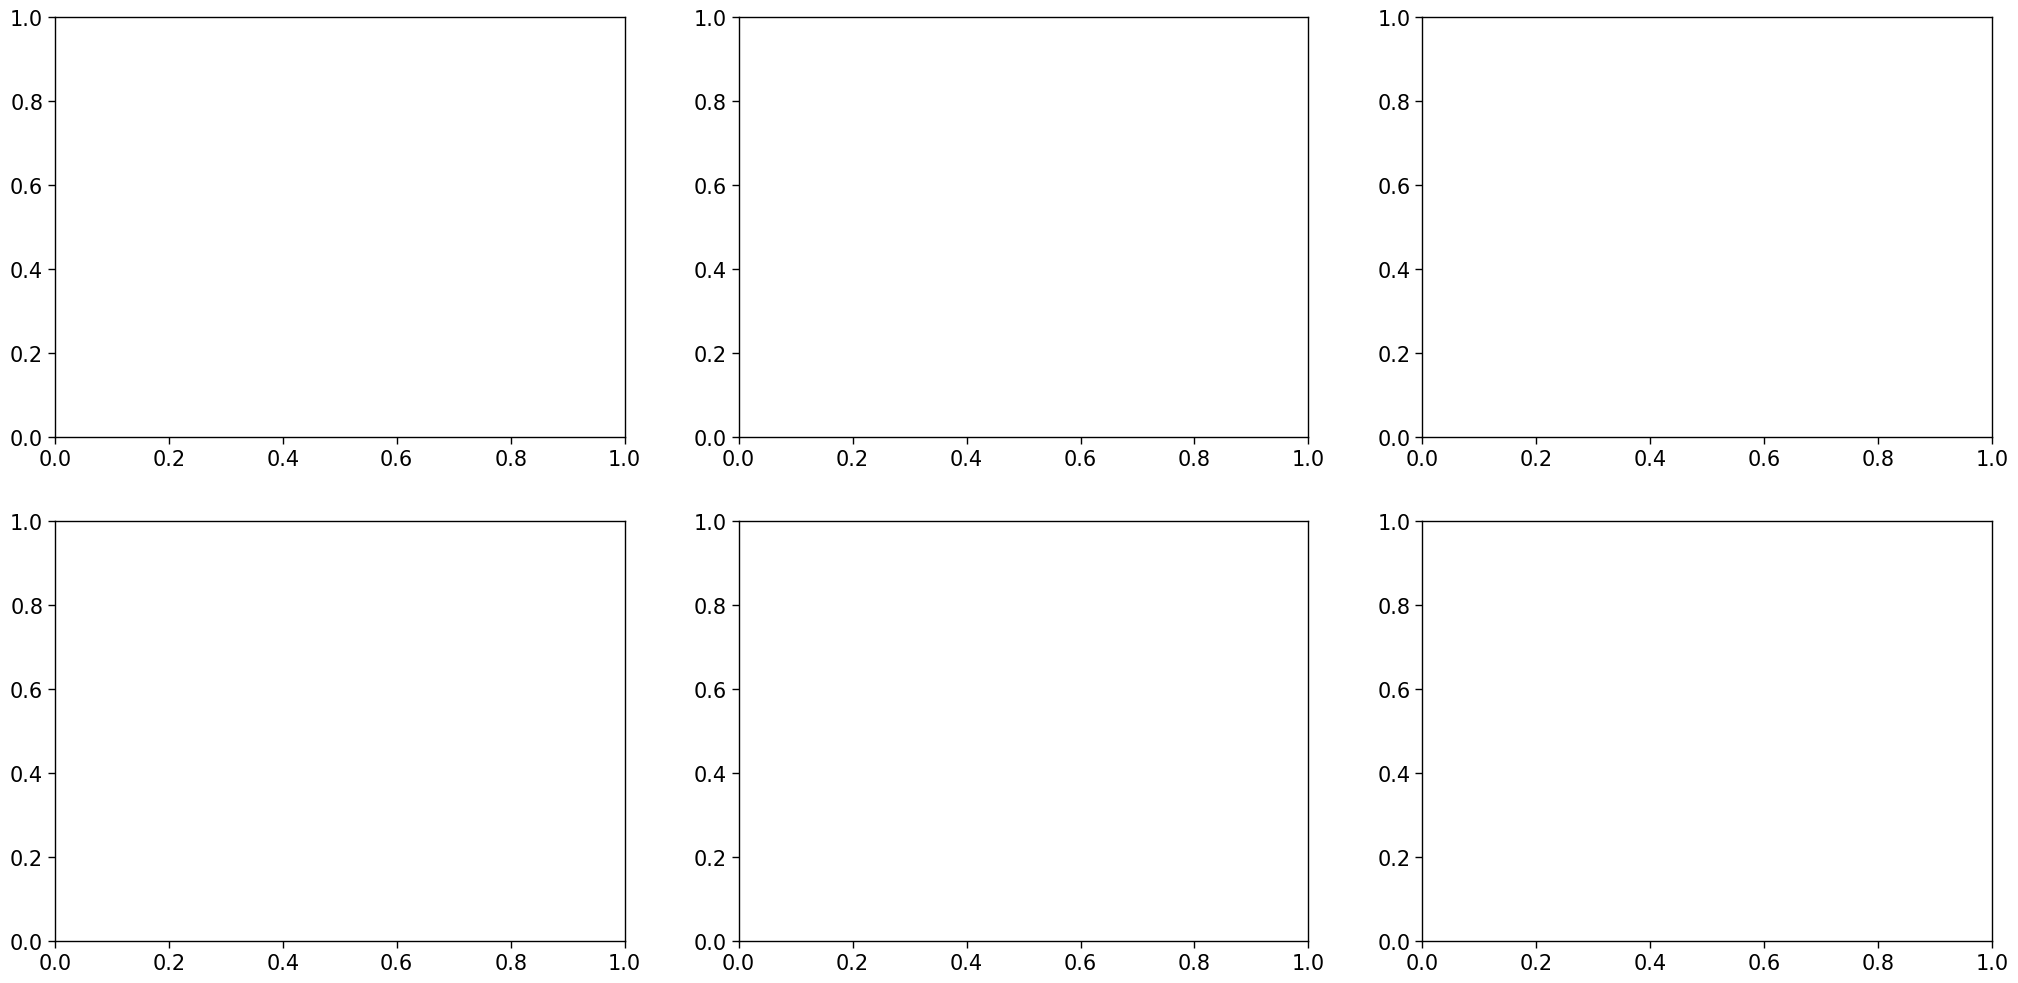

In [ ]:
cont_data = [ c for c in data.columns if c not in categorical_features_]
cols = 3

rows =max (1 , len(cont_data) // cols )

fig, ax= plt.subplots(rows, cols, figsize=(25, 6 * rows)) #25

axes = ax.flatten()
i=0
# data_part = data.copy()
# sample_part = sample.copy()
data_part = data[(data['Total_Trans_Ct'] >= 60) & (data['Total_Trans_Ct'] <= 80)]
sample_part = sample[(sample['Total_Trans_Ct'] >= 60) & (sample['Total_Trans_Ct'] <= 80)]
for col in cont_data:
            sns.distplot(data_part[col], ax=axes[i], label='Real', color = 'blue')

            sns.distplot(sample_part[col], ax=axes[i], label='Fake', color = 'orange')

            axes[i].set_title(col, size=20)
            axes[i].legend(loc=0,prop={'size': 20})

            i+=1

<AxesSubplot: >

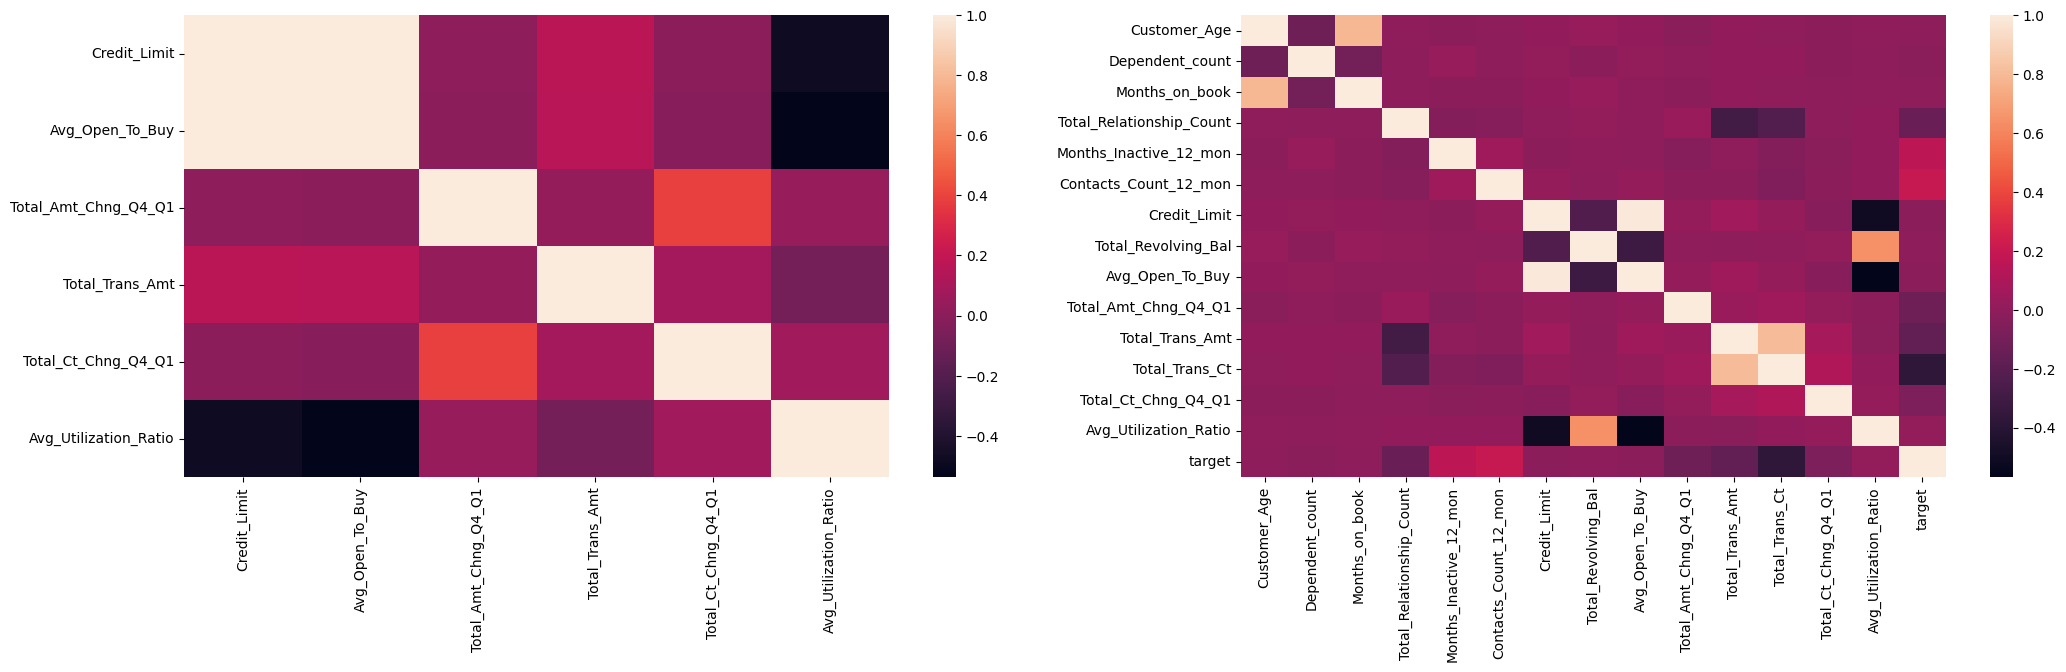

In [ ]:
fig, axes= plt.subplots(1, 2, figsize=(25, 6))
sns.heatmap(data.select_dtypes(exclude=['object']).corr(), ax=axes[0], label='Real', color = 'blue')
sns.heatmap(sample.select_dtypes(exclude=['object']).corr(), ax=axes[1], label='Fake', color = 'orange')


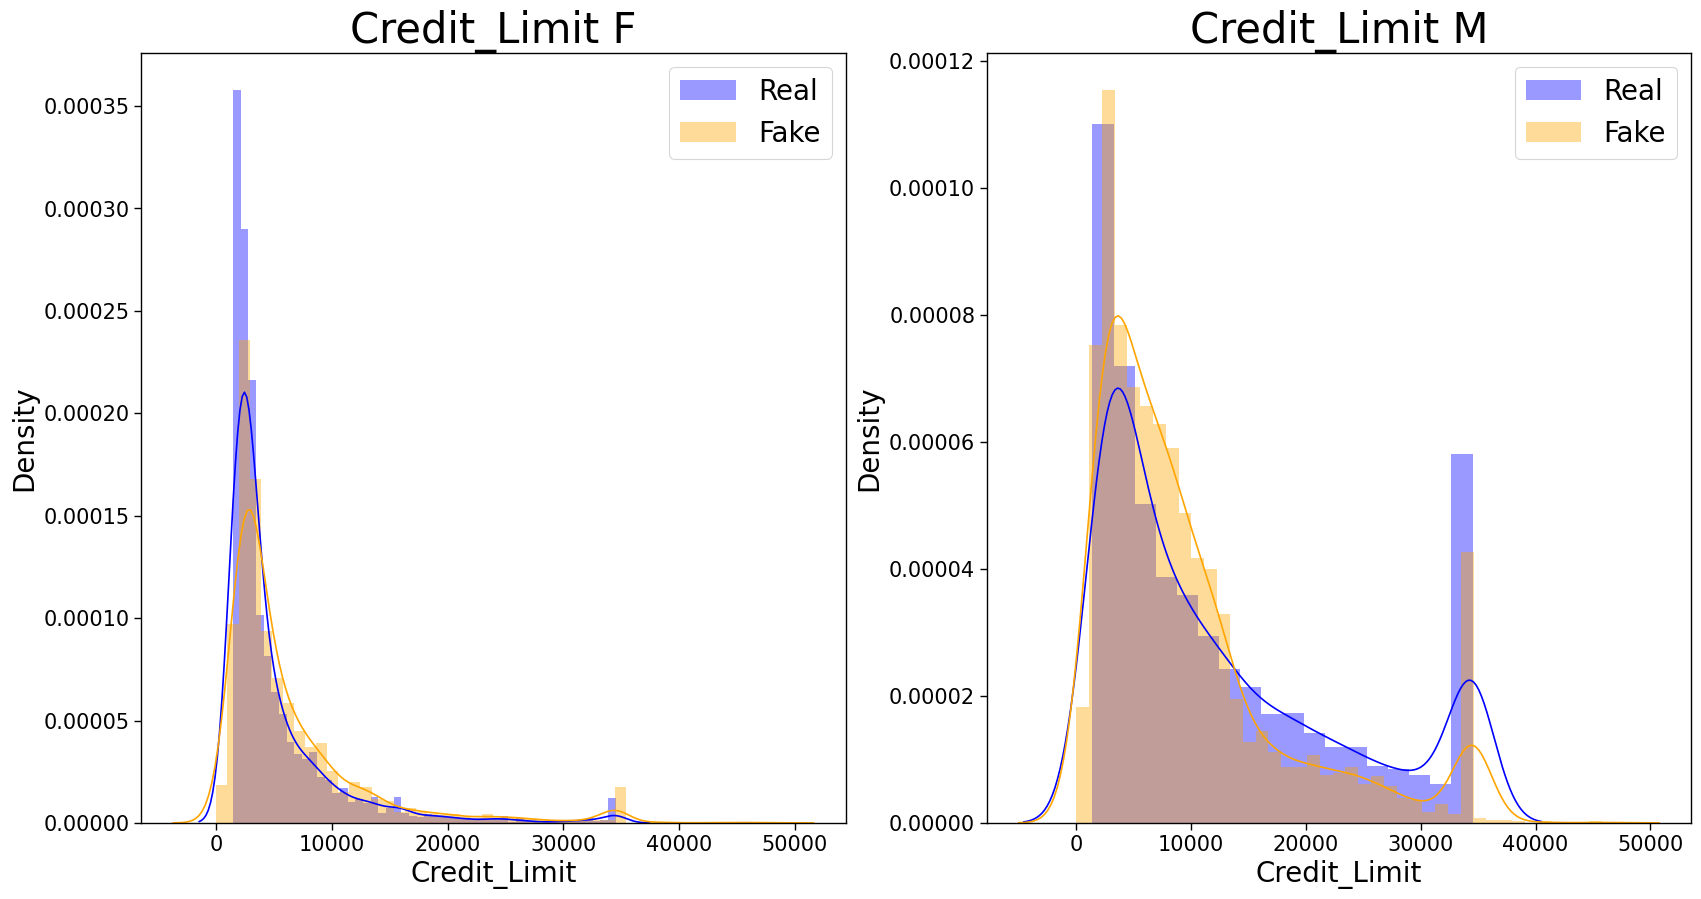

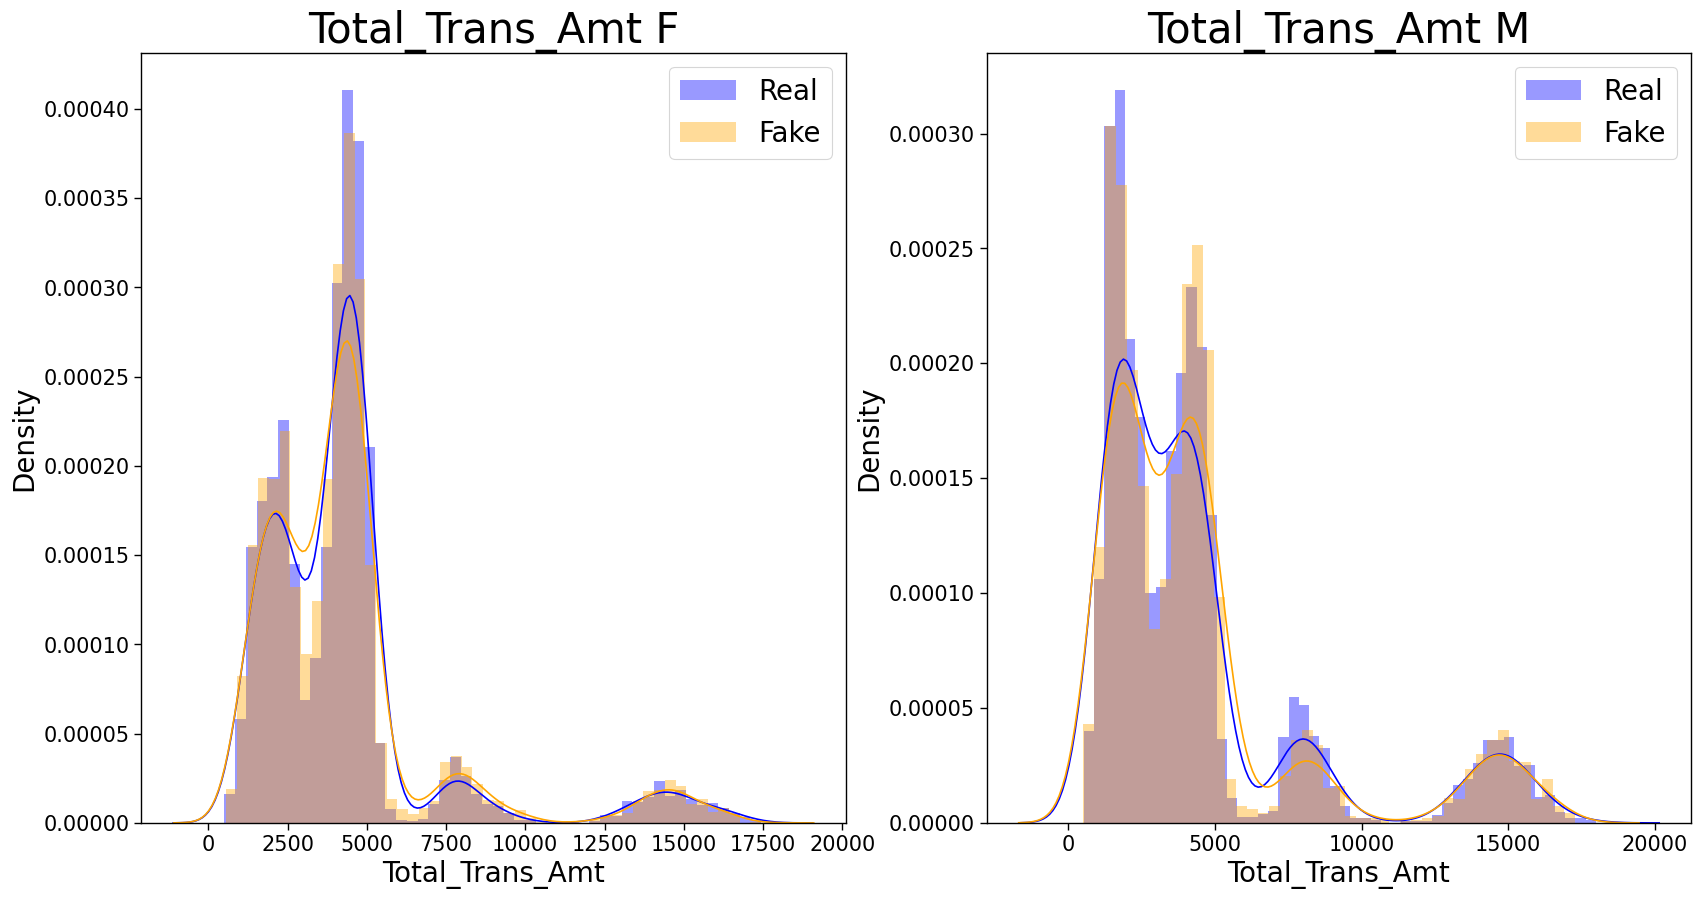

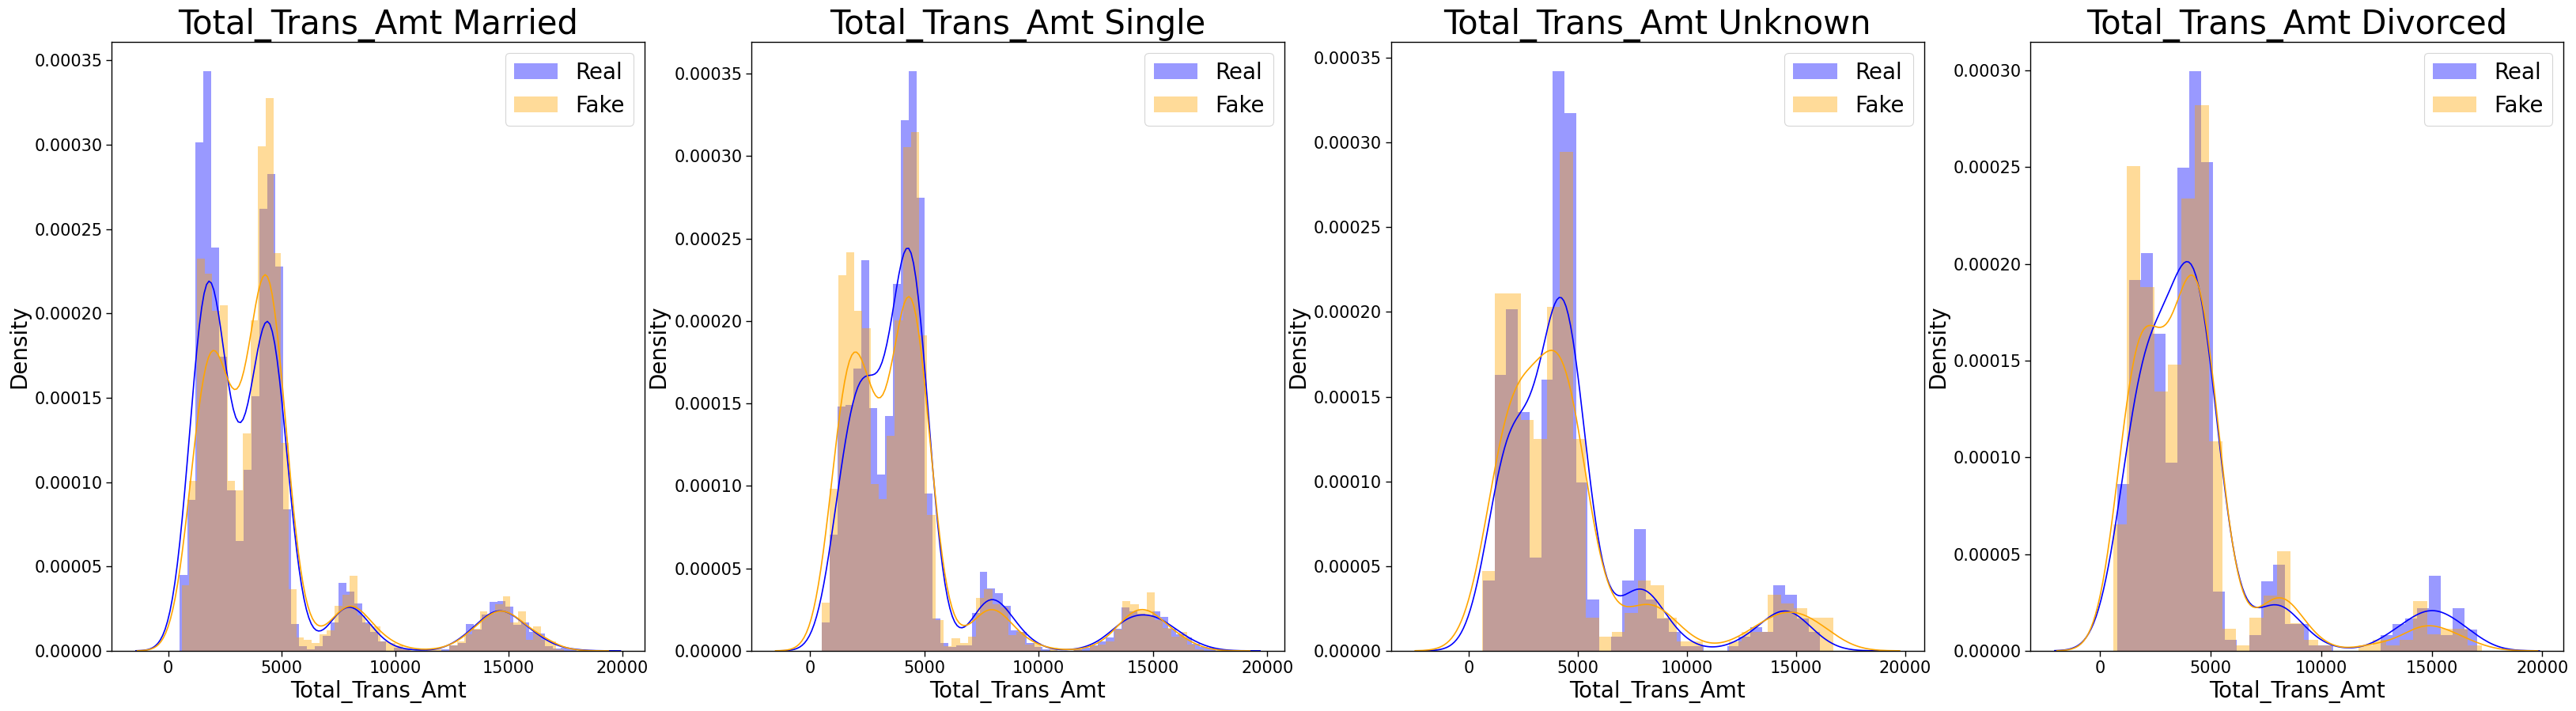

In [ ]:
plot_cols = {'Gender': ['Credit_Limit', 'Total_Trans_Amt'],
 'Marital_Status': ['Total_Trans_Amt']}
sns.set_context("paper", rc={"axes.titlesize":30,"axes.labelsize":20, "legend.fontsize": 20, "xtick.labelsize":15, "ytick.labelsize":15})
for cat_name in plot_cols:
  cats= sample[cat_name].value_counts().index
  for col in plot_cols[cat_name]:
    fig, ax= plt.subplots(1, len(cats), figsize=(10*len(cats), 10),)
    for i, cat in enumerate(cats):
      sns.distplot(data[data[cat_name]==cat][col], ax=ax[i], label='Real', color = 'blue')
      sns.distplot(sample[sample[cat_name]==cat][col], ax=ax[i], label='Fake', color = 'orange',)
      ax[i].set_title(f'{col} {cat}')
      ax[i].legend(loc=0)

# Regression

In [ ]:
data = pd.read_csv('drive/MyDrive/Diploma/data/NYC-Airbnb-2023.csv')
data = data.drop(['host_id', 'host_name', 'last_review', 'reviews_per_month', 'license', 'id', 'name'], axis=1)
data = data.drop_duplicates().reset_index(drop=True)
data = data.dropna().reset_index(drop=True)
data

neighbourhood_group       neighbourhood   latitude  longitude  \
0               Manhattan             Midtown  40.753560 -73.985590   
1                Brooklyn  Bedford-Stuyvesant  40.685350 -73.955120   
2               Manhattan     Upper West Side  40.803800 -73.967510   
3               Manhattan             Midtown  40.764570 -73.983170   
4                Brooklyn         Sunset Park  40.662650 -73.994540   
...                   ...                 ...        ...        ...   
42853            Brooklyn        Williamsburg  40.718976 -73.963985   
42854           Manhattan        East Village  40.721703 -73.981473   
42855            Brooklyn            Bushwick  40.688700 -73.907650   
42856       Staten Island         Bull's Head  40.616911 -74.164652   
42857            Brooklyn        Williamsburg  40.713091 -73.957205   

             room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt    150              30                 49   
1         Private room     60              30                 50   
2         Private room     75               2                118   
3         Private room     68               2                575   
4      Entire home/apt    275              60                  3   
...                ...    ...             ...                ...   
42853  Entire home/apt     76               7                  0   
42854     Private room     32              30                  0   
42855  Entire home/apt    127               3                  0   
42856  Entire home/apt    280               1                  0   
42857     Private room     78              90                  0   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                                   3               314                      1  
1                                   2               365                      0  
2                                   1                 0                      0  
3                                   1               106                     52  
4                                   1               181                      1  
...                               ...               ...                    ...  
42853                               1                 8                      0  
42854                               5                79                      0  
42855                               8               356                      0  
42856                               1                87                      0  
42857                              69               309                      0  

[42858 rows x 11 columns]

In [ ]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [ ]:
data.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1),
                                                    data['price'], test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)

In [ ]:
real_data = X_train.copy()
real_data['price'] = y_train
categorical_features = list(real_data.loc[:, real_data.dtypes == object].columns)

print(categorical_features)

['neighbourhood_group', 'neighbourhood', 'room_type']


In [ ]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(real_data)

In [ ]:
bn = nets.HybridBN(has_logit=False, use_mixture=True) # init BN
info = p.info
info

{'types': {'neighbourhood_group': 'disc',
  'neighbourhood': 'disc',
  'latitude': 'cont',
  'longitude': 'cont',
  'room_type': 'disc',
  'minimum_nights': 'disc_num',
  'number_of_reviews': 'disc_num',
  'calculated_host_listings_count': 'disc_num',
  'availability_365': 'disc_num',
  'number_of_reviews_ltm': 'disc_num',
  'price': 'disc_num'},
 'signs': {'latitude': 'pos', 'longitude': 'neg'}}

In [ ]:
bn.add_nodes(info)

In [ ]:
bn.get_info()

name        node_type data_type parents  \
0              neighbourhood_group         Discrete      disc      []   
1                    neighbourhood         Discrete      disc      []   
2                         latitude  MixtureGaussian      cont      []   
3                        longitude  MixtureGaussian      cont      []   
4                        room_type         Discrete      disc      []   
5                   minimum_nights         Discrete  disc_num      []   
6                number_of_reviews         Discrete  disc_num      []   
7   calculated_host_listings_count         Discrete  disc_num      []   
8                 availability_365         Discrete  disc_num      []   
9            number_of_reviews_ltm         Discrete  disc_num      []   
10                           price         Discrete  disc_num      []   

   parents_types  
0             []  
1             []  
2             []  
3             []  
4             []  
5             []  
6             []  
7             []  
8             []  
9             []  
10            []

In [ ]:
%%time
bn.fit_parameters(data)

CPU times: user 1min, sys: 1min 3s, total: 2min 3s
Wall time: 1min 21s


In [ ]:
import pickle

with open("BN_model_test_K2", "wb") as f:
    pickle.dump(bn, f)

In [ ]:
import pickle

with open("BN_model_test_K2", "rb") as f:
    bn = pickle.load(f)

In [ ]:
bn.plot('Graph_airbnb.html')

In [ ]:
%%time
sample = bn.sample(real_data.shape[0])

100%|██████████| 38572/38572 [00:41<00:00, 923.70it/s] 


CPU times: user 41.1 s, sys: 243 ms, total: 41.4 s
Wall time: 42.3 s


In [ ]:
sample = sample.astype(data.dtypes.to_dict())
sample = sample[data.columns]

In [ ]:
sample.head()

neighbourhood_group       neighbourhood   latitude  longitude     room_type  \
0            Brooklyn        Clason Point  40.715068 -73.929094  Private room   
1           Manhattan  Bedford-Stuyvesant  40.818800 -73.950208  Private room   
2           Manhattan  Washington Heights  40.712427 -73.869879  Private room   
3           Manhattan      Hell's Kitchen  40.718394 -73.952706  Private room   
4           Manhattan  Bedford-Stuyvesant  40.789285 -73.949820  Private room   

  price minimum_nights number_of_reviews calculated_host_listings_count  \
0   481              1               314                              1   
1  1704              1                 6                              2   
2   995             90                11                              1   
3   195             30                 0                              1   
4   850             30                 4                              2   

  availability_365 number_of_reviews_ltm  
0              273                     0  
1                0                     0  
2              334                     0  
3              243                    12  
4              176                     1

In [ ]:
sample.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                     object
number_of_reviews                  object
calculated_host_listings_count     object
availability_365                   object
number_of_reviews_ltm              object
dtype: object

In [ ]:
sample.price = sample.price.astype(float)
sample.minimum_nights = sample.minimum_nights.astype(int)
sample.number_of_reviews = sample.number_of_reviews.astype(int)
sample.calculated_host_listings_count = sample.calculated_host_listings_count.astype(int)
sample.availability_365 = sample.availability_365.astype(int)
sample.number_of_reviews_ltm = sample.number_of_reviews_ltm.astype(int)

In [ ]:
sample.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

# Test

In [ ]:
def lgbm_predict(xx_train, yy_train, xx_test, yy_test, categorical_features, reg=False):
  for col in categorical_features:
    xx_train[col] = xx_train[col].astype('category')
    xx_test[col] = xx_test[col].astype('category')
  if not reg:
    model = lgb.LGBMClassifier(random_state=42, categorical_feature=categorical_features)
    model.fit(xx_train, yy_train)
    y_pred_test = model.predict_proba(xx_test)[:, 1]
  else:
    model = lgb.LGBMRegressor(random_state=42, categorical_feature=categorical_features)
    model.fit(xx_train, yy_train)
    y_pred_test = model.predict(xx_test)
  return y_pred_test

def fit_predict(clf, xx_train, yy_train, xx_test, yy_test, reg=False):
  clf.fit(xx_train,yy_train)
  if not reg:
    y_pred_test = clf.predict_proba(xx_test)[:, 1]
  else:
      y_pred_test = clf.predict(xx_test)
  return y_pred_test


In [ ]:
!pip install feature_engine

ERROR: Operation cancelled by user


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
#from feature_engine import encoding as ce
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
#from feature_engine import encoding as ce

from sklearn.metrics import f1_score, fbeta_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold,cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


import torch

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [ ]:
categorical_features=list(X_train.loc[:, X_train.dtypes== object].columns)
categorical_features

['neighbourhood_group', 'neighbourhood', 'room_type']

In [ ]:
LinR_pipe = Pipeline([
    ('encoding', ce.OrdinalEncoder(
       unseen='encode', encoding_method='ordered', variables=categorical_features)),
    ('scaler', StandardScaler()),
    ('LinReg', LinearRegression())
    ])

RFL_pipe = Pipeline([
    ('encoding', ce.OrdinalEncoder(
       encoding_method='ordered', variables=categorical_features)),
    ('scaler', StandardScaler()),
    ('RF', RandomForestRegressor())
    ])

In [ ]:
y_pred_test_initial_linr = fit_predict(LinR_pipe, X_train.copy(), y_train, X_test, y_test, reg=True)
y_pred_test_ctgan_linr = fit_predict(LinR_pipe, sample.drop(['price'], axis=1), sample['price'], X_test, y_test, reg=True)

y_pred_test_initial_rfreg = fit_predict(RFL_pipe, X_train.copy(), y_train, X_test, y_test, reg=True)
y_pred_test_ctgan_rfreg = fit_predict(RFL_pipe, sample.drop(['price'], axis=1), sample['price'], X_test, y_test, reg=True)

y_pred_test_initial_lgbmreg = lgbm_predict(X_train.copy(), y_train, X_test, y_test, categorical_features, reg=True)
y_pred_test_ctgan_lgbmreg = lgbm_predict(sample.drop(['price'], axis=1), sample['price'], X_test, y_test, categorical_features, reg=True)

[LightGBM] [Warning] categorical_feature is set=neighbourhood_group,neighbourhood,room_type, categorical_column=0,1,4 will be ignored. Current value: categorical_feature=neighbourhood_group,neighbourhood,room_type
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1488
[LightGBM] [Info] Number of data points in the train set: 38572, number of used features: 10
[LightGBM] [Info] Start training from score 197.487737
[LightGBM] [Warning] categorical_feature is set=neighbourhood_group,neighbourhood,room_type, categorical_column=0,1,4 will be ignored. Current value: categorical_feature=neighbourhood_group,neighbourhood,room_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

In [ ]:
df_linr = pd.DataFrame(data=[mean_absolute_error(y_test,  y_pred_test_initial_linr), mean_absolute_error(y_test,  y_pred_test_ctgan_linr)],
                     columns = ['Test'],
                     index = ['Initial', 'BAMT'] )
df_linr['model']='LinR'

df_rfreg = pd.DataFrame(data=[mean_absolute_error(y_test,  y_pred_test_initial_rfreg), mean_absolute_error(y_test,  y_pred_test_ctgan_rfreg)],
                     columns = ['Test'],
                     index = ['Initial', 'BAMT'] )
df_rfreg['model']='RF'

df_lgbmreg = pd.DataFrame(data=[mean_absolute_error(y_test,  y_pred_test_initial_lgbmreg), mean_absolute_error(y_test,  y_pred_test_ctgan_lgbmreg)],
                   columns = ['Test'],
                      index = ['Initial', 'BAMT'] )

df_lgbmreg['model']='Lgbm'

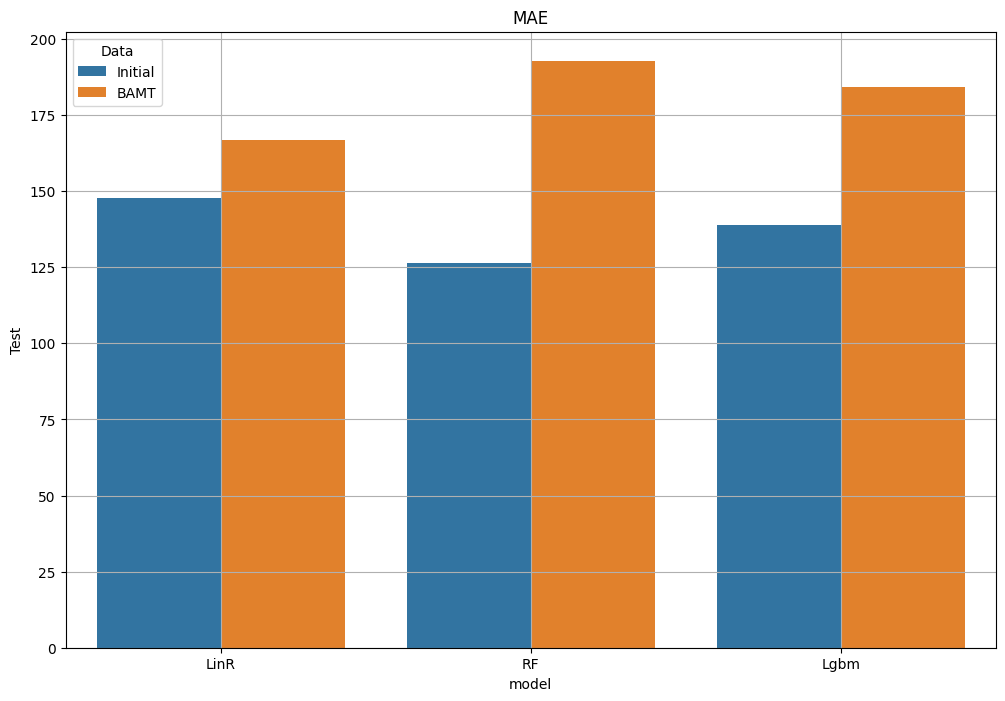

In [ ]:
df=pd.concat([df_linr, df_rfreg, df_lgbmreg])
df.index.rename('Data', inplace=True)
df.reset_index(inplace=True)

fig = plt.figure(figsize=(12,8))
sns.barplot(x = 'model', y = 'Test', hue = 'Data', data = df)
plt.title('MAE')
plt.grid()
plt.show()

In [ ]:
df

Data        Test model
0  Initial  147.835108  LinR
1     BAMT  166.669940  LinR
2  Initial  126.414302    RF
3     BAMT  192.768180    RF
4  Initial  139.002811  Lgbm
5     BAMT  184.161239  Lgbm

In [ ]:
df.to_csv('drive/MyDrive/Diploma/data/bamt_mae.csv')

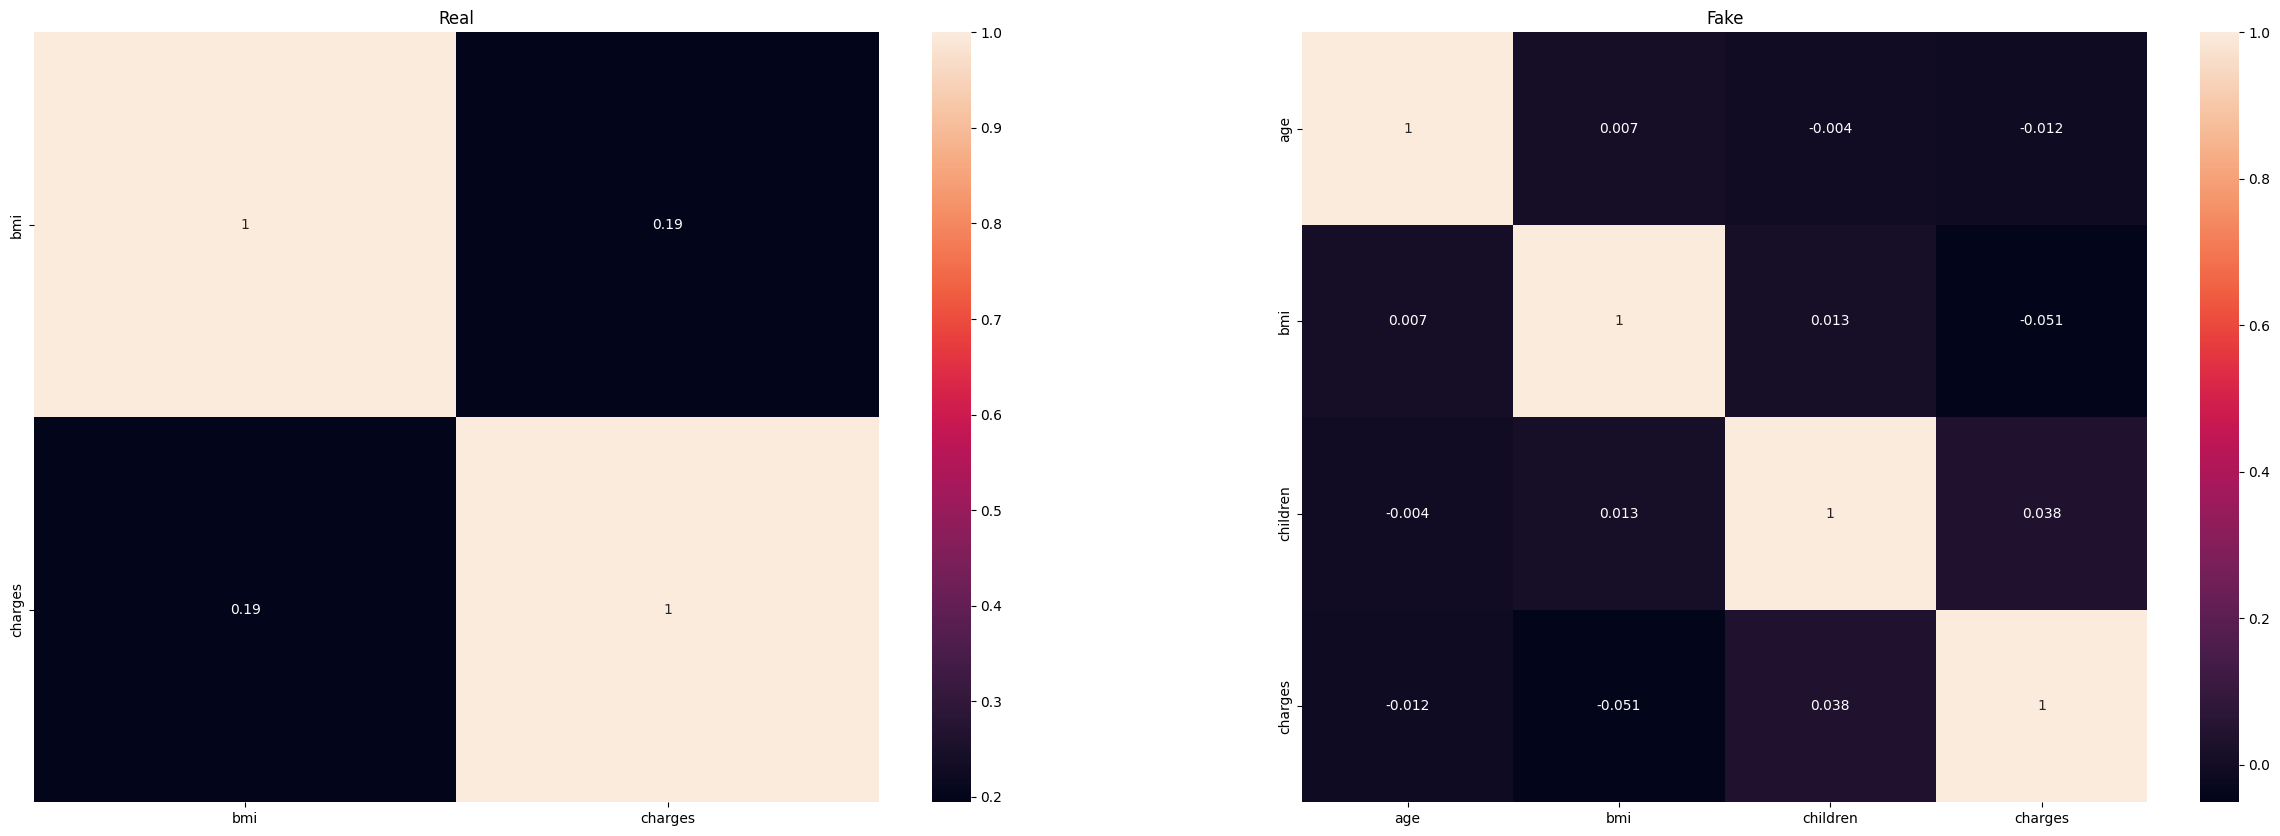

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.heatmap(real_data.select_dtypes(exclude=['object']).corr(), ax=axes[0], annot=True)
sns.heatmap(sample.select_dtypes(exclude=['object']).corr(), ax=axes[1], annot=True)
axes[0].set_title('Real')
axes[1].set_title('Fake')
fig.show()